In [1]:
import numpy as np
import pandas as pd

Air quality data obtained from https://aqicn.org/historical/

In [2]:
air_voe = pd.read_excel('wiener-straße 233, straßenbahnstation neue welt-air-quality.xlsx', index_col=0)

In [3]:
air_voe.sort_values(by='date', inplace = True)

In [4]:
air_voe.head()

,pm25,pm10,no2,so2,co
date,,,,,
2013-12-31,NaN,28.0,11.0,1.0,NaN
2014-01-01,78.0,32.0,16.0,1.0,NaN
2014-01-02,90.0,43.0,19.0,1.0,NaN
2014-01-03,121.0,25.0,13.0,1.0,NaN
2014-01-04,79.0,14.0,14.0,1.0,NaN


In [5]:
air_voe.tail()

,pm25,pm10,no2,so2,co
date,,,,,
2025-05-01,36.0,16.0,12.0,NaN,NaN
2025-05-02,37.0,21.0,14.0,1.0,NaN
2025-05-03,50.0,9.0,4.0,NaN,NaN
2025-05-04,22.0,10.0,12.0,5.0,NaN
2025-05-05,29.0,NaN,NaN,NaN,NaN


In [6]:
import seaborn as sns

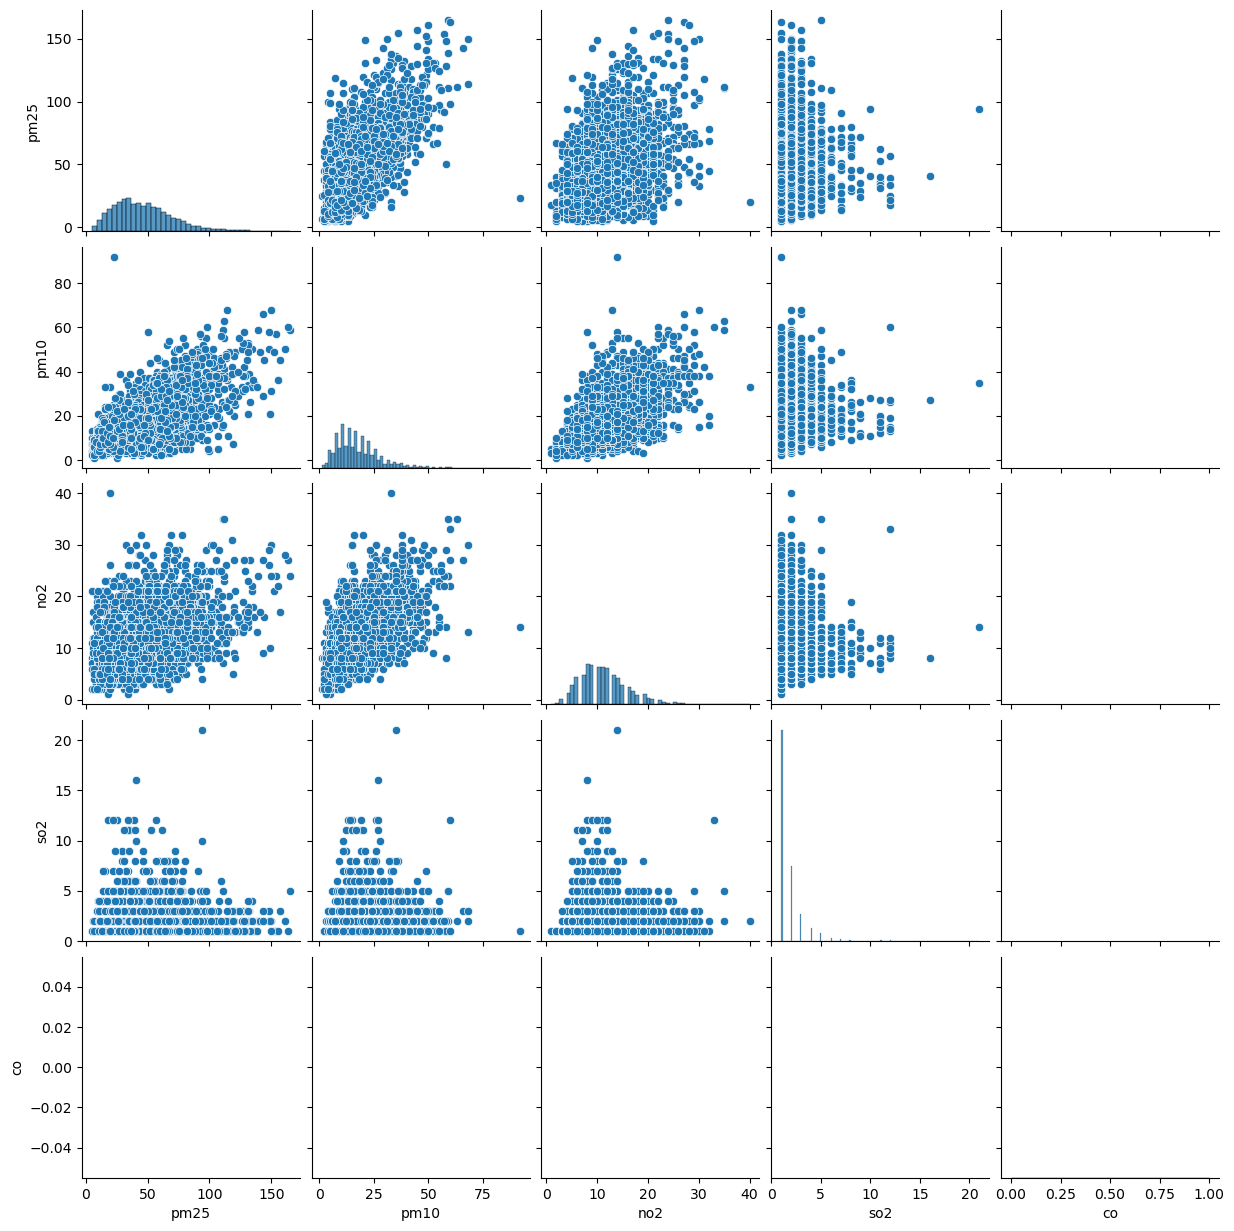

In [7]:
sns.pairplot(air_voe)

Checking for missing values

<Axes: ylabel='date'>

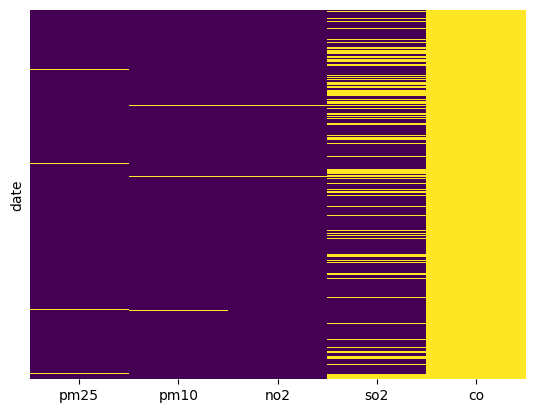

In [8]:
sns.heatmap(air_voe.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Verifying there are no CO readings

In [9]:
air_voe['co'].value_counts()

Series([], Name: count, dtype: int64)

In [10]:
air_voe.drop('co', axis=1, inplace=True)

A brief overview shows cyclicity in emissions

<Axes: xlabel='date'>

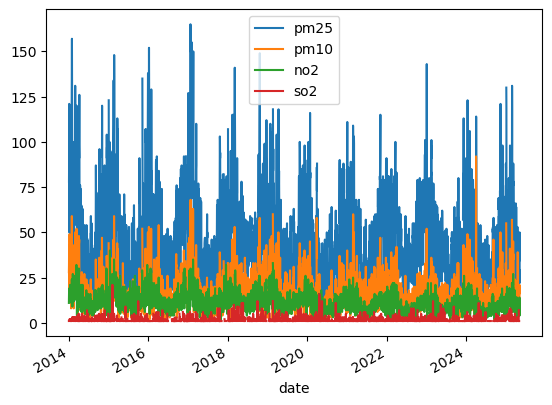

In [11]:
air_voe.plot()

Emission data for 2024

<Axes: xlabel='date'>

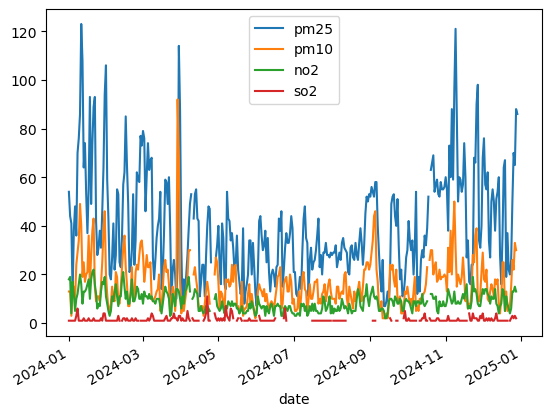

In [12]:
air_voe[air_voe.index.map(lambda d: d.year == 2024)].plot()

Estimated and reported earnings per share in EUR obtained from tradingview.com

In [13]:
earnings = pd.read_excel('voe_earnings.xlsx', sheet_name=None, index_col=0)
earnings_qt = earnings['earnings_quarterly']
earnings_an = earnings['earnings_annual']

In [14]:
earnings_qt.head()

,Reported,Estimate,Surprise
Quarter,,,
Q4 '19,‪0.12‬,‪0.07‬,0.7143
Q1 '20,‪−0.40‬,‪−0.69‬,0.4203
Q2 '20,‪−1.13‬,‪−0.43‬,−161.27%
Q3 '20,‪0.66‬,‪0.10‬,5.8276
Q4 '20,‪1.12‬,‪0.56‬,1.0095


In [15]:
earnings_an.head()

,Reported,Estimate,Surprise
2015,‪3.18‬,‪3.00‬,0.0615
2016,‪2.84‬,‪2.73‬,0.0384
2017,‪4.40‬,‪4.17‬,0.0554
2018,‪2.31‬,‪2.36‬,−2.10%
2019,‪−1.24‬,‪−1.46‬,0.1486


In [16]:
earnings_qt.iloc[0]['Reported']

'\u202a0.12\u202c'

Problem with the formatting

In [17]:
earnings_qt.iloc[0]['Reported'].replace('\u202a', '').replace('\u202c', '')

'0.12'

In [18]:
float(earnings_qt.iloc[0]['Reported'].replace('\u202a', '').replace('\u202c', ''))

0.12

In [19]:
earnings_qt.iloc[1]['Reported'].replace('\u202a', '').replace('\u202c', '')

'−0.40'

In [20]:
earnings_qt.iloc[1]['Reported'].replace('\u202a', '').replace('\u202c', '').replace("\u2212", "-")

'-0.40'

In [21]:
float(earnings_qt.iloc[1]['Reported'].replace('\u202a', '').replace('\u202c', '').replace("\u2212", "-"))

-0.4

Cleaning some more:

In [22]:
earnings_qt = earnings_qt[['Reported', 'Estimate']].map(lambda s: s if type(s) == float else float(s.replace('\u202a', '').replace('\u202c', '').replace("\u2212", "-")))

In [23]:
earnings_an = earnings_an[['Reported', 'Estimate']].map(lambda s: s if type(s) == float else float(s.replace('\u202a', '').replace('\u202c', '').replace("\u2212", "-")))

In [24]:
earnings_qt

,Reported,Estimate
Quarter,,
Q4 '19,0.12,0.07
Q1 '20,-0.40,-0.69
Q2 '20,-1.13,-0.43
Q3 '20,0.66,0.10
Q4 '20,1.12,0.56
Q1 '21,1.42,1.26
Q2 '21,1.26,1.15
Q3 '21,1.15,1.11
Q4 '21,2.01,1.76


In [25]:
earnings_an

,Reported,Estimate
2015,3.18,3.00
2016,2.84,2.73
2017,4.40,4.17
2018,2.31,2.36
2019,-1.24,-1.46
2020,0.24,-0.54
2021,5.84,5.87
2022,5.48,5.64
2023,0.64,1.67
2024,NaN,1.62


<Axes: xlabel='Quarter'>

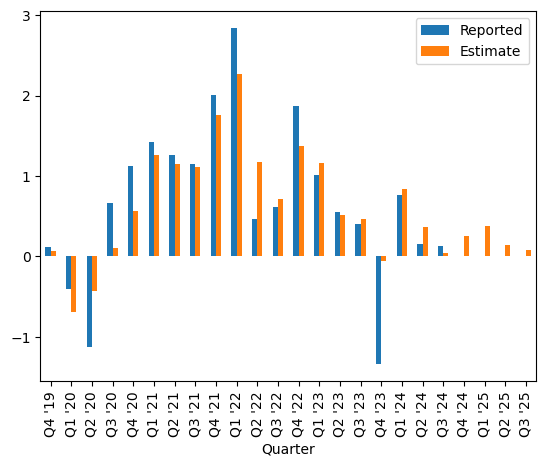

In [26]:
earnings_qt.plot(kind='bar')

Q1 looks to tend towards higher estimated and reported earnings. Let's verify, looking at the quarters where we have data:

In [27]:
reported_qt = earnings_qt[earnings_qt['Reported'].notna()]

In [28]:
reported_qt.set_index(reported_qt.index.map(lambda s: s[:3])).reset_index().groupby('Quarter').mean()

,Reported,Estimate
Quarter,,
Q1,1.128,0.968
Q2,0.260,0.558
Q3,0.592,0.484
Q4,0.756,0.742


Is the cyclicity similar to the one we saw in the air quality data?

In [29]:
air_voe['quarter'] = air_voe.index.map(lambda d: d.month).map(dict(zip(range(1,13), sum([[x] * 3 for x in 'Q4 Q1 Q2 Q3'.split()], []))))

In [30]:
q_air_means = air_voe.groupby('quarter').mean()

<Axes: ylabel='quarter'>

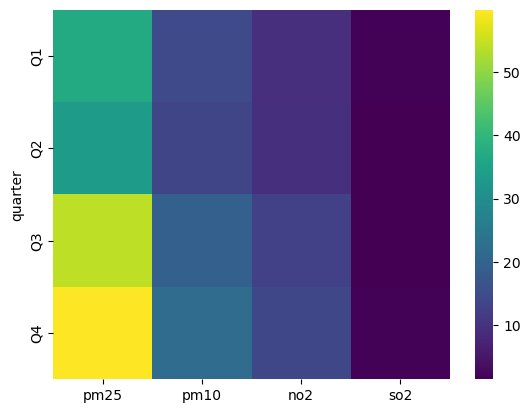

In [31]:
sns.heatmap(q_air_means, cmap='viridis')

Normalizing:

<Axes: ylabel='quarter'>

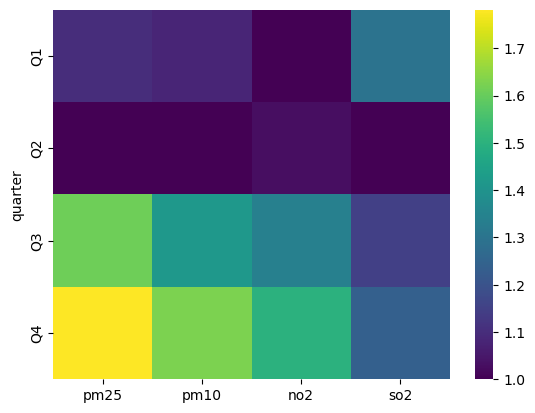

In [32]:
sns.heatmap(q_air_means.apply(lambda x: x / q_air_means.apply(min), axis=1, result_type='broadcast'), cmap='viridis')

SO2 seems to be uncorrelated

In [33]:
q_air_means.corr()

,pm25,pm10,no2,so2
pm25,1.000000,0.993522,0.984177,0.336368
pm10,0.993522,1.000000,0.987006,0.367481
no2,0.984177,0.987006,1.000000,0.213727
so2,0.336368,0.367481,0.213727,1.000000


<Axes: >

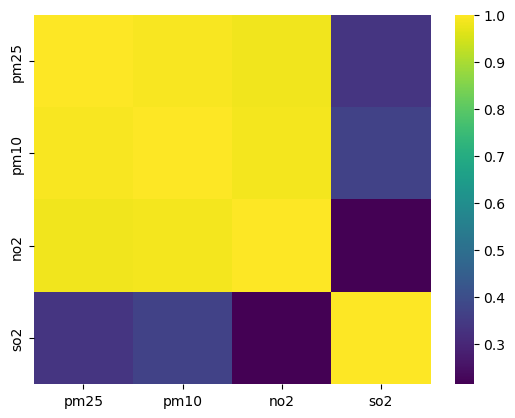

In [34]:
sns.heatmap(q_air_means.corr(), cmap='viridis')

In [35]:
air_voe

,pm25,pm10,no2,so2,quarter
date,,,,,
2013-12-31,NaN,28.0,11.0,1.0,Q3
2014-01-01,78.0,32.0,16.0,1.0,Q4
2014-01-02,90.0,43.0,19.0,1.0,Q4
2014-01-03,121.0,25.0,13.0,1.0,Q4
2014-01-04,79.0,14.0,14.0,1.0,Q4
...,...,...,...,...,...
2025-05-01,36.0,16.0,12.0,NaN,Q1
2025-05-02,37.0,21.0,14.0,1.0,Q1
2025-05-03,50.0,9.0,4.0,NaN,Q1


In [40]:
earnings_qt

,Reported,Estimate
Quarter,,
Q4 '19,0.12,0.07
Q1 '20,-0.40,-0.69
Q2 '20,-1.13,-0.43
Q3 '20,0.66,0.10
Q4 '20,1.12,0.56
Q1 '21,1.42,1.26
Q2 '21,1.26,1.15
Q3 '21,1.15,1.11
Q4 '21,2.01,1.76


In [49]:
air_voe.loc['2019-01-01':'2024-12-31']

,pm25,pm10,no2,so2,quarter
date,,,,,
2019-01-01,42.0,3.0,6.0,NaN,Q4
2019-01-02,12.0,6.0,9.0,NaN,Q4
2019-01-03,19.0,14.0,15.0,NaN,Q4
2019-01-04,46.0,7.0,7.0,NaN,Q4
2019-01-05,26.0,9.0,12.0,NaN,Q4
...,...,...,...,...,...
2024-12-26,70.0,22.0,13.0,2.0,Q3
2024-12-27,65.0,33.0,15.0,3.0,Q3
2024-12-28,88.0,30.0,13.0,2.0,Q3


In [53]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

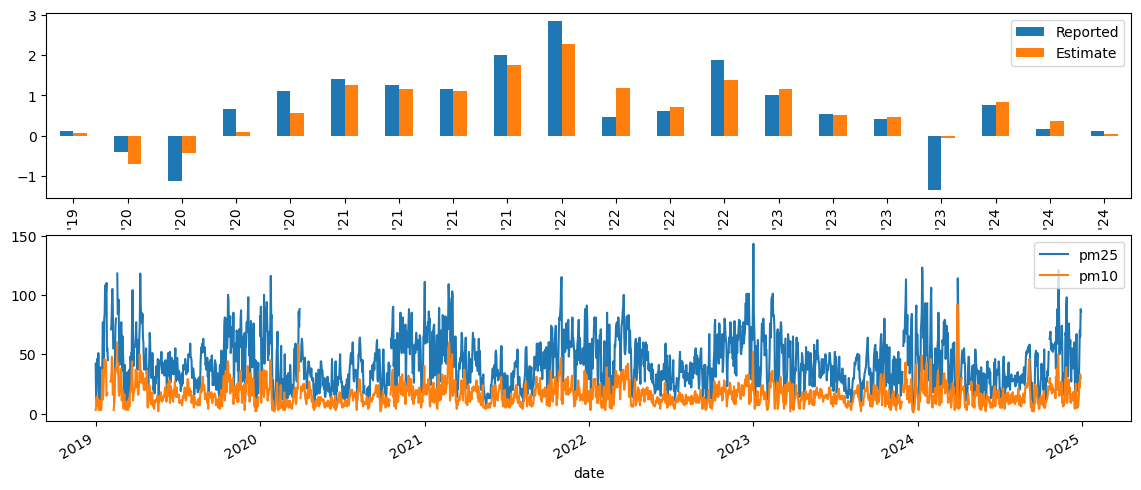

In [63]:
fig, axes = plt.subplots(2,1, figsize=(14,6))

reported_qt.plot(kind='bar', ax=axes[0])
air_voe[['pm25', 'pm10']].loc['2019-01-01':'2024-12-31'].plot(ax=axes[1])

In [36]:
lm_data = pd.get_dummies(air_voe, columns=['quarter'], drop_first=True)